In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load raw DRKG data
raw_df = pd.read_csv(r"C:/Users/Manasa/drkg/drkg.tsv", sep="\t", header=None)
raw_df.columns = ["head", "relation", "tail"]


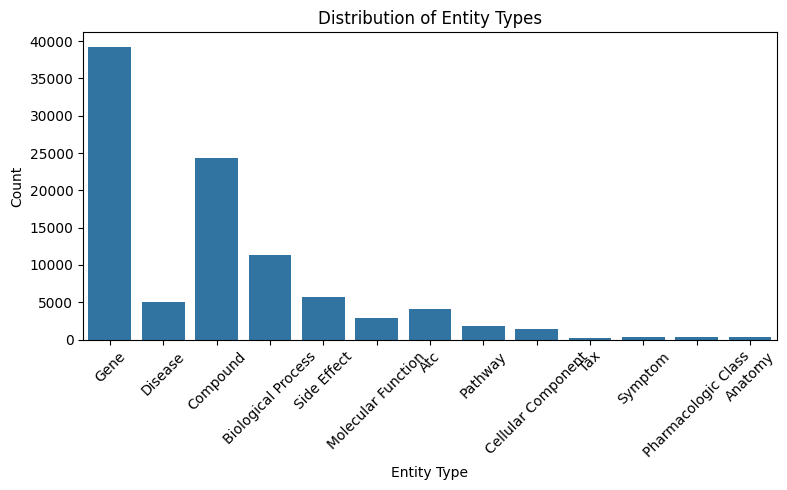

In [2]:

# -----------------------------
# 1. Distribution of Entity Types
# -----------------------------
def get_entity_type(entity):
    if "::" in entity:
        return entity.split("::")[0]
    return "Other"

entities = set(raw_df["head"]).union(set(raw_df["tail"]))
entity_types = [get_entity_type(e) for e in entities]
entity_type_counts = Counter(entity_types)

plt.figure(figsize=(8,5))
sns.barplot(x=list(entity_type_counts.keys()), y=list(entity_type_counts.values()))
plt.title("Distribution of Entity Types")
plt.ylabel("Count")
plt.xlabel("Entity Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


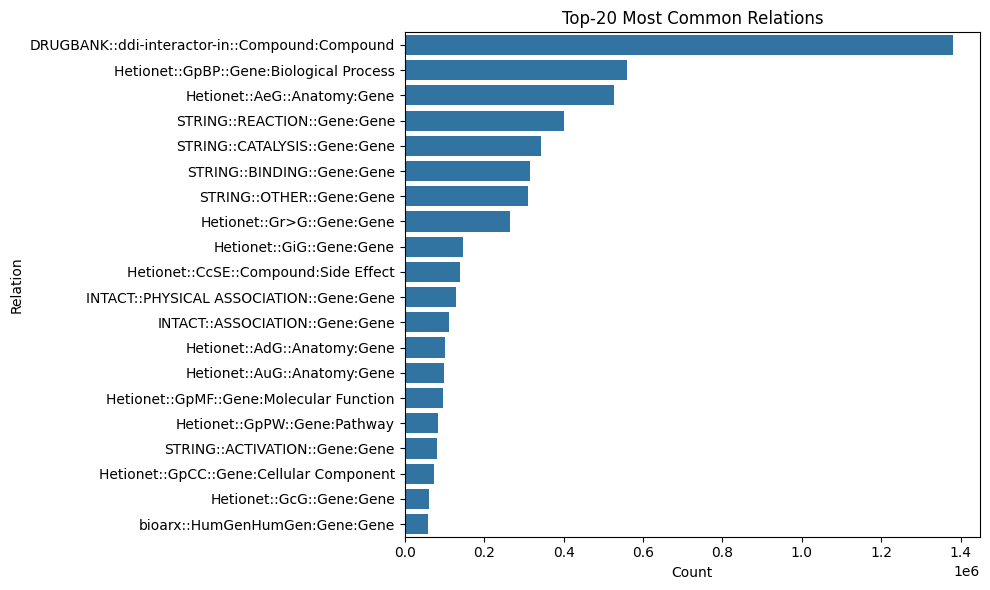

In [3]:

# -----------------------------
# 2. Top-20 Most Common Relations
# -----------------------------
relation_counts = raw_df["relation"].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=relation_counts.values, y=relation_counts.index)
plt.title("Top-20 Most Common Relations")
plt.xlabel("Count")
plt.ylabel("Relation")
plt.tight_layout()
plt.show()

# -----------------------------
# 3. Degree Distribution for Drug–Disease Connections
# -----------------------------
drug_disease_edges = raw_df[
    (raw_df["head"].str.contains("Compound::") & raw_df["tail"].str.contains("Disease::")) |
    (raw_df["tail"].str.contains("Compound::") & raw_df["head"].str.contains("Disease::"))
]

# Count number of diseases per drug
drug_connections = Counter()
disease_connections = Counter()

for _, row in drug_disease_edges.iterrows():
    if "Compound::" in row["head"]:
        drug = row["head"]
        disease = row["tail"]
    else:
        drug = row["tail"]
        disease = row["head"]

    drug_connections[drug] += 1
    disease_connections[disease] += 1

drug_deg = pd.DataFrame(list(drug_connections.items()), columns=["Drug", "Disease_Count"])
disease_deg = pd.DataFrame(list(disease_connections.items()), columns=["Disease", "Drug_Count"])


In [4]:
# -----------------------------
# Top-10 Hubs
# -----------------------------
print("\n Top 10 Drugs with Most Disease Connections:")
print(drug_deg.sort_values("Disease_Count", ascending=False).head(10))



 Top 10 Drugs with Most Disease Connections:
                        Drug  Disease_Count
2557  Compound::MESH:D013256            574
2033   Compound::CHEBI:35341            482
603        Compound::DB00898            439
7912  Compound::MESH:D000305            424
834        Compound::DB01234            421
371        Compound::DB00563            373
1234       Compound::DB09140            372
577        Compound::DB00860            323
421        Compound::DB00635            320
632        Compound::DB00945            309


In [5]:
print("\nTop 10 Diseases with Most Drug Connections:")
print(disease_deg.sort_values("Drug_Count", ascending=False).head(10))



Top 10 Diseases with Most Drug Connections:
                    Disease  Drug_Count
1108  Disease::MESH:D009369        1931
1135  Disease::MESH:D064420        1372
50    Disease::MESH:D003920         826
177   Disease::MESH:D006973         703
13    Disease::MESH:D001943         628
1101  Disease::MESH:D007674         619
487   Disease::MESH:D003866         597
30    Disease::MESH:D007239         560
1213  Disease::MESH:D056486         548
17    Disease::MESH:D010146         478


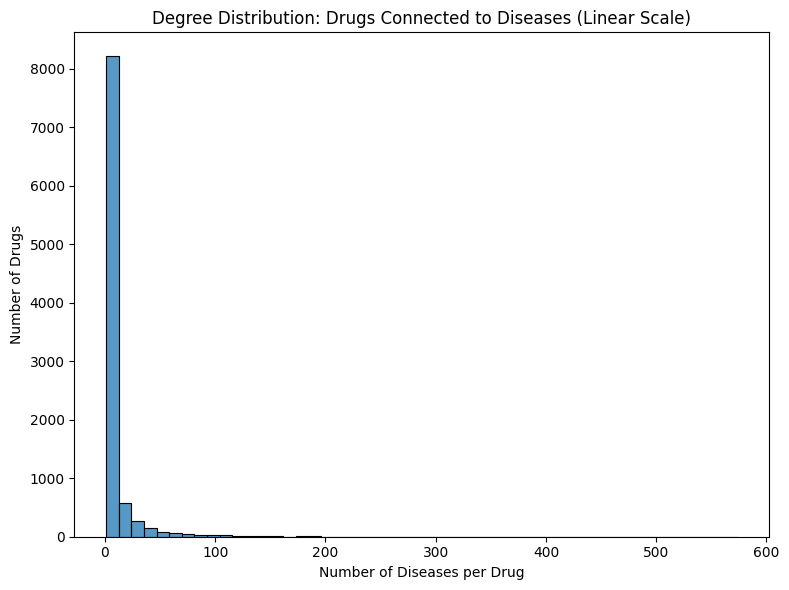

In [6]:

# ---- Linear histogram for drugs
plt.figure(figsize=(8,6))
sns.histplot(drug_deg["Disease_Count"], bins=50, kde=False)
plt.title("Degree Distribution: Drugs Connected to Diseases (Linear Scale)")
plt.xlabel("Number of Diseases per Drug")
plt.ylabel("Number of Drugs")
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Number of Drugs (log scale)')

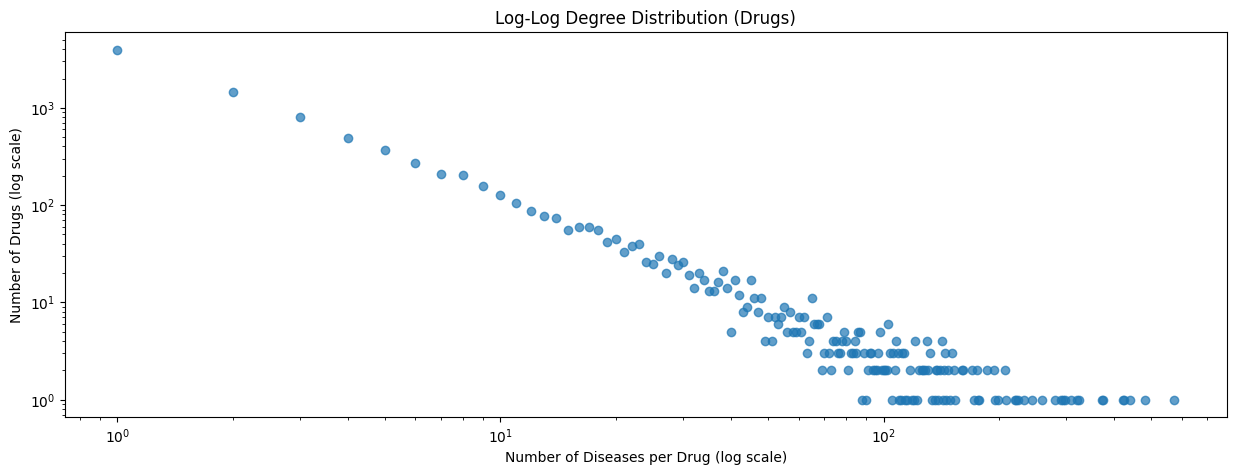

In [9]:

# ---- Log-Log plots for Drugs and Diseases
plt.figure(figsize=(15,5))

# Drugs

drug_counts = drug_deg["Disease_Count"].value_counts().sort_index()
plt.scatter(drug_counts.index, drug_counts.values, alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.title("Log-Log Degree Distribution (Drugs)")
plt.xlabel("Number of Diseases per Drug (log scale)")
plt.ylabel("Number of Drugs (log scale)")


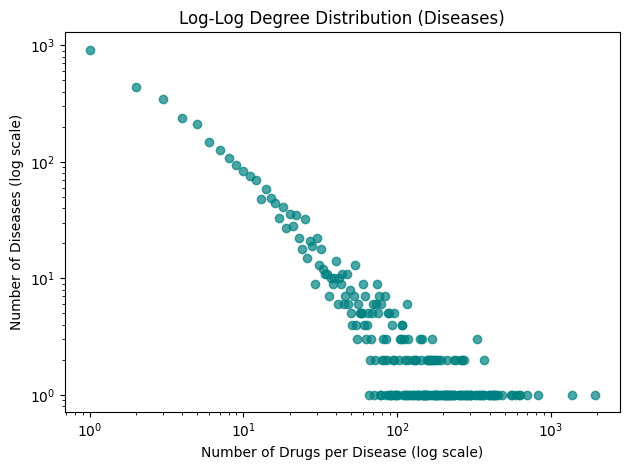

In [10]:

# Diseases
disease_counts = disease_deg["Drug_Count"].value_counts().sort_index()
plt.scatter(disease_counts.index, disease_counts.values, alpha=0.7, color="teal")
plt.xscale("log")
plt.yscale("log")
plt.title("Log-Log Degree Distribution (Diseases)")
plt.xlabel("Number of Drugs per Disease (log scale)")
plt.ylabel("Number of Diseases (log scale)")

plt.tight_layout()
plt.show()
